<a href="https://colab.research.google.com/github/teckMUk/setdetection/blob/master/card_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import cv2
import os
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline

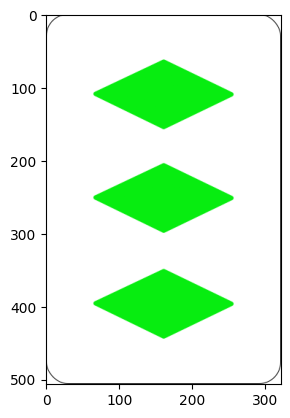

In [21]:
image = imread('/content/drive/MyDrive/images/diamond_green_filled_3.png')
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) #reshape as generator need a 4d image not 3d
imshow(images[0])
show()

#Expriment to see how images will look generated by Image Data generatot


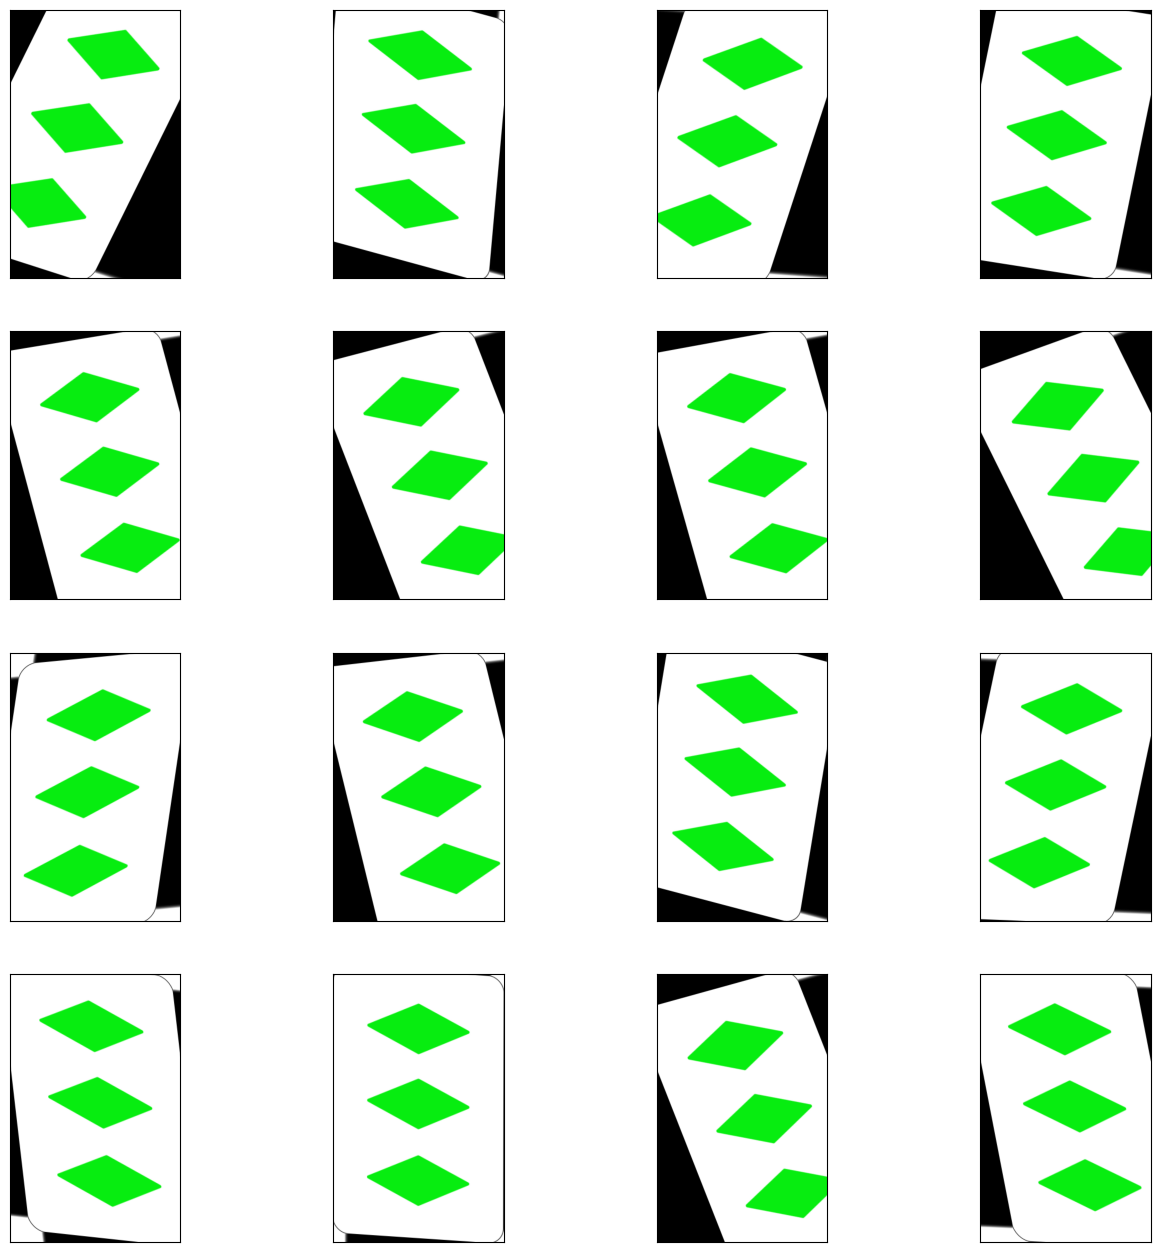

In [22]:
data_generator = ImageDataGenerator(rotation_range=20, shear_range=15.0)
data_generator.fit(images)
image_iterator = data_generator.flow(images)
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_iterator.next()[0])
plt.show()

# preprocessing + augmentation

In [24]:
data=[]

for i, imgName in tqdm(enumerate(os.listdir('/content/drive/MyDrive/images/'))):
    label=imgName

    img = cv2.imread('/content/drive/MyDrive/images/'+imgName, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=20, shear_range=15.0)
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)

    for x in range(200):
        img_transformed=image_iterator.next()[0]
        data.append([img_transformed, label])

shuffle(data)

81it [00:58,  1.39it/s]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# model Training


## prep

In [25]:
X=[]
y=[]
for point in data:
    X.append(point[0])
    y.append(point[1])



In [26]:
num_samples, height, width, channels = np.array(X).shape
X = np.array(X)
data_2d = X.reshape((num_samples, height * width * channels)) #reshape to make it 2d for sklear as it only works with 2d-arrays

In [27]:

X_train, X_test, y_train, y_test = train_test_split(data_2d, y, test_size=0.20, random_state=42)

#Training


In [28]:
k = 5 # You can adjust this value
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test/validation set
y_pred = knn_classifier.predict(X_test)
# print(y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6354938271604939


Ignore for now.


## training

In [14]:
# tf.keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

# epochs=250
# batch_size=32

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(52, activation='softmax')
# ])

# model.summary()

# cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
#                                save_best_only=True,
#                                verbose=0)

# model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# history = model.fit(X_test, y_train, epochs=epochs, batch_size=batch_size,
#                     validation_data=(X_test, y_test), callbacks=[cp]).history

## training process plots

In [15]:
# acc = history['accuracy']
# val_acc = history['val_accuracy']
# loss = history['loss']
# val_loss = history['val_loss']
# epochs = range(len(acc))

# plt.figure(figsize = (12,8))
# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend(loc=0)
# plt.figure()
# plt.show()

# plt.figure(figsize = (12,8))
# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()
# plt.show()

NameError: ignored

# sample prediction

In [ ]:
# df=pd.read_csv('card_labels.csv')
# labels=list(df['label'])

# predictions=model.predict_classes(test_X)

# sample=test_X[:16]

# plt.figure(figsize=(16,16))
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
#     plt.xlabel(labels[predictions[i]])
# plt.show()